In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [2]:
now = datetime.now()

start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

C:\Users\ankit\AppData\Local\Temp\ipykernel_8912\3729526159.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-03,26.526632,27.451615,26.320582,27.211970,279904000
2015-08-04,25.675558,26.360896,25.364244,26.298186,496554400
2015-08-05,25.845770,26.302662,25.106679,25.297050,397250400
2015-08-06,25.902020,26.210244,25.674790,26.091004,211612000
2015-08-07,25.989756,26.153992,25.760276,25.778275,154681600
...,...,...,...,...,...
2025-07-28,214.050003,214.850006,213.059998,214.029999,37858000
2025-07-29,211.270004,214.809998,210.820007,214.179993,51411700


# 2. Data Exploration & Visualization

In [3]:
df.head()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-03,26.526632,27.451615,26.320582,27.211970,279904000
2015-08-04,25.675558,26.360896,25.364244,26.298186,496554400
2015-08-05,25.845770,26.302662,25.106679,25.297050,397250400
2015-08-06,25.902020,26.210244,25.674790,26.091004,211612000
2015-08-07,25.989756,26.153992,25.760276,25.778275,154681600


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape


(2515, 5)

In [6]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,104.900698,105.955891,103.740570,104.805161,1.085414e+08
std,69.242686,69.923397,68.485656,69.174546,6.375751e+07
min,20.647453,20.951435,20.448614,20.569752,2.323470e+07
25%,39.672653,40.090932,39.214512,39.677776,6.589765e+07
50%,95.610283,97.163178,94.040403,96.402531,9.348760e+07
75%,165.904320,167.614274,164.088190,165.827040,1.315472e+08
max,258.396667,259.474086,257.010028,257.568678,6.488252e+08


In [8]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [9]:
df.reset_index()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-08-03,26.526632,27.451615,26.320582,27.211970,279904000
1,2015-08-04,25.675558,26.360896,25.364244,26.298186,496554400
2,2015-08-05,25.845770,26.302662,25.106679,25.297050,397250400
3,2015-08-06,25.902020,26.210244,25.674790,26.091004,211612000
4,2015-08-07,25.989756,26.153992,25.760276,25.778275,154681600
...,...,...,...,...,...,...
2510,2025-07-28,214.050003,214.850006,213.059998,214.029999,37858000
2511,2025-07-29,211.270004,214.809998,210.820007,214.179993,51411700
2512,2025-07-30,209.050003,212.389999,207.720001,211.899994,45512500


Text(0, 0.5, 'Close Price')

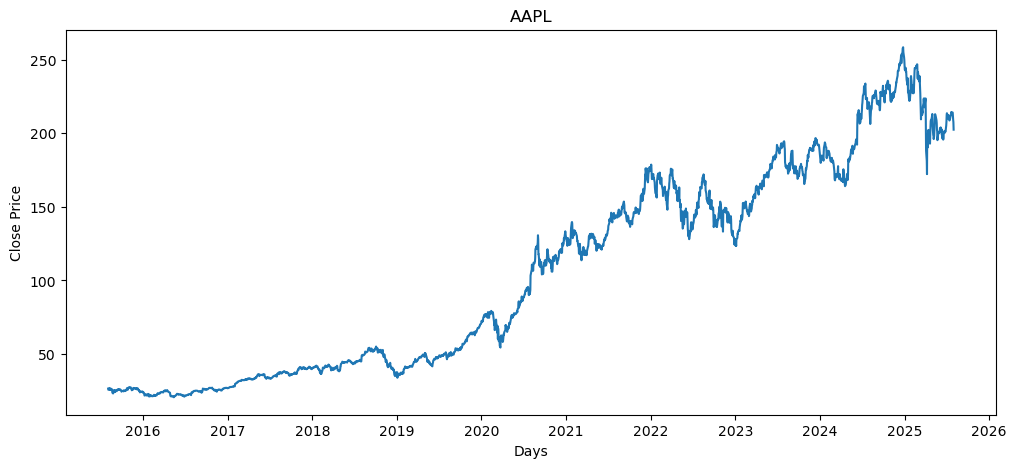

In [10]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price')

# 3. Feature Engineering

In [11]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA of 5 days ==> null null null null 30 40 50 60 70 80

In [12]:
temp_df = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_df[5:10])/5)

80.0


In [13]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [14]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### 100 days Moving Average

In [15]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head(103)

Price,Close,High,Low,Open,Volume,MA_100
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2015-08-03,26.526632,27.451615,26.320582,27.211970,279904000,NaN
2015-08-04,25.675558,26.360896,25.364244,26.298186,496554400,NaN
2015-08-05,25.845770,26.302662,25.106679,25.297050,397250400,NaN
2015-08-06,25.902020,26.210244,25.674790,26.091004,211612000,NaN
2015-08-07,25.989756,26.153992,25.760276,25.778275,154681600,NaN
...,...,...,...,...,...,...
2015-12-21,24.250530,24.259568,23.852869,24.239232,190362400,NaN
2015-12-22,24.227936,24.338648,24.051698,24.266346,131157600,25.726896


Text(0, 0.5, 'Close Price')

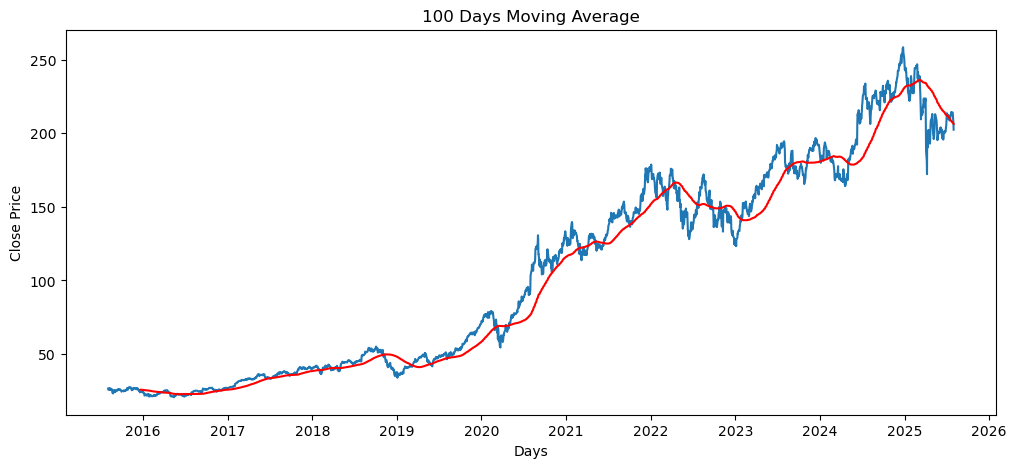

In [16]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Close Price')


### 200 Days Moving Average

In [17]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)


Price,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2015-08-03,26.526632,27.451615,26.320582,27.211970,279904000,NaN,NaN
2015-08-04,25.675558,26.360896,25.364244,26.298186,496554400,NaN,NaN
2015-08-05,25.845770,26.302662,25.106679,25.297050,397250400,NaN,NaN
2015-08-06,25.902020,26.210244,25.674790,26.091004,211612000,NaN,NaN
2015-08-07,25.989756,26.153992,25.760276,25.778275,154681600,NaN,NaN
...,...,...,...,...,...,...,...
2016-05-16,21.456532,21.573094,20.946860,21.115988,245039200,22.907153,NaN
2016-05-17,21.367403,21.643952,21.257699,21.609670,187667600,22.878548,24.302722


Text(0, 0.5, 'Close Price')

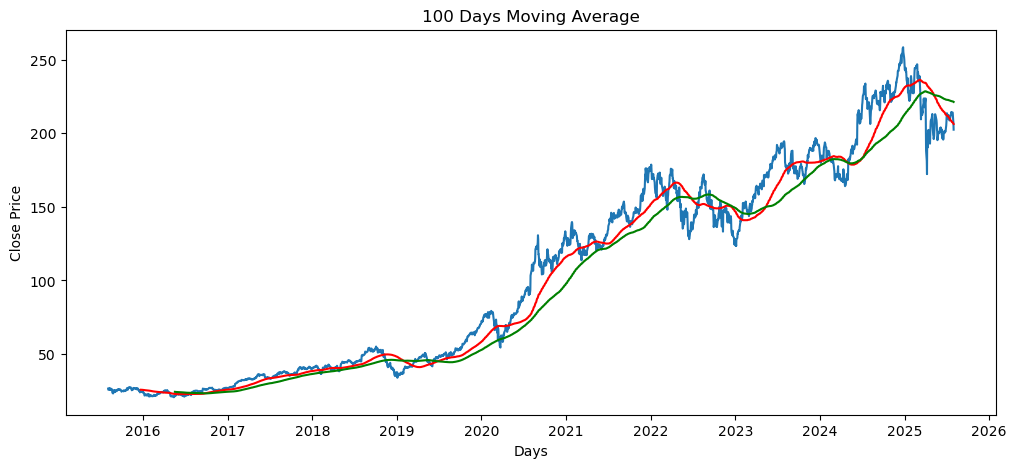

In [18]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')
plt.plot(df['MA_200'],'g')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Close Price')


In [19]:
df

Price,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2015-08-03,26.526632,27.451615,26.320582,27.211970,279904000,NaN,NaN
2015-08-04,25.675558,26.360896,25.364244,26.298186,496554400,NaN,NaN
2015-08-05,25.845770,26.302662,25.106679,25.297050,397250400,NaN,NaN
2015-08-06,25.902020,26.210244,25.674790,26.091004,211612000,NaN,NaN
2015-08-07,25.989756,26.153992,25.760276,25.778275,154681600,NaN,NaN
...,...,...,...,...,...,...,...
2025-07-28,214.050003,214.850006,213.059998,214.029999,37858000,207.310985,221.630999
2025-07-29,211.270004,214.809998,210.820007,214.179993,51411700,207.069373,221.562453


### Calculating % change in each trading session

In [20]:
df['Percentage Change'] = df.Close.pct_change()
df[['Close','Percentage Change']]

Price,Close,Percentage Change
Ticker,AAPL,
Date,,
2015-08-03,26.526632,NaN
2015-08-04,25.675558,-0.032084
2015-08-05,25.845770,0.006629
2015-08-06,25.902020,0.002176
2015-08-07,25.989756,0.003387
...,...,...
2025-07-28,214.050003,0.000795
2025-07-29,211.270004,-0.012988


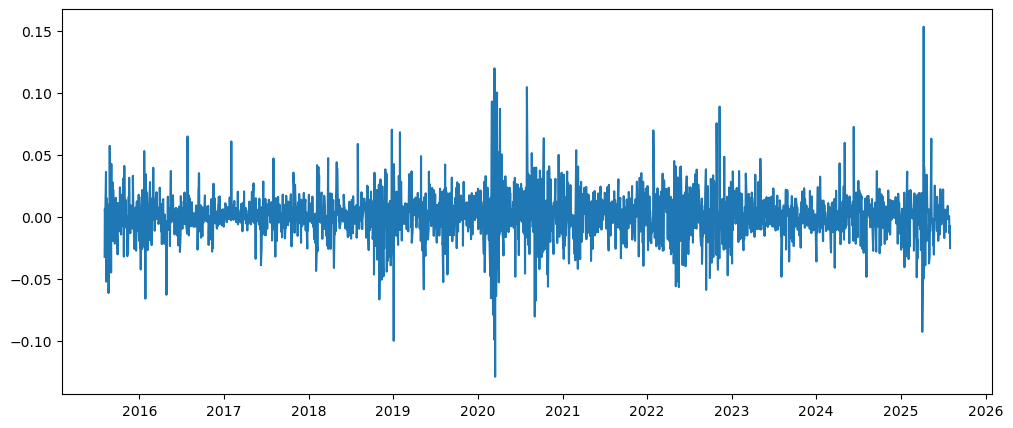

In [21]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Change'])
# plt.plot(df['MA_100'],'r')
# plt.title('100 Days Moving Average')
# plt.xlabel('Days')
# plt.ylabel('Close Price')


# 4 Data Preprocessibg

In [22]:
df.shape

(2515, 8)

In [23]:
# Splitting data into Training & Testing datasets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])

print(data_training)
print(data_testing)

Ticker            AAPL
Date                  
2015-08-03   26.526632
2015-08-04   25.675558
2015-08-05   25.845770
2015-08-06   25.902020
2015-08-07   25.989756
...                ...
2022-07-22  151.656906
2022-07-25  150.534943
2022-07-26  149.206253
2022-07-27  154.314270
2022-07-28  154.865448

[1760 rows x 1 columns]
Ticker            AAPL
Date                  
2022-07-29  159.943954
2022-08-01  158.959763
2022-08-02  157.483429
2022-08-03  163.506821
2022-08-04  163.191864
...                ...
2025-07-28  214.050003
2025-07-29  211.270004
2025-07-30  209.050003
2025-07-31  207.570007
2025-08-01  202.380005

[755 rows x 1 columns]


In [24]:
data_training


Ticker,AAPL
Date,
2015-08-03,26.526632
2015-08-04,25.675558
2015-08-05,25.845770
2015-08-06,25.902020
2015-08-07,25.989756
...,...
2022-07-22,151.656906
2022-07-25,150.534943
2022-07-26,149.206253


In [26]:
data_testing


Ticker,AAPL
Date,
2022-07-29,159.943954
2022-08-01,158.959763
2022-08-02,157.483429
2022-08-03,163.506821
2022-08-04,163.191864
...,...
2025-07-28,214.050003
2025-07-29,211.270004
2025-07-30,209.050003


In [27]:
type(data_training)

pandas.core.frame.DataFrame

In [28]:
# Scaling down the data between 0 and 1

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [30]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.03721042],
       [0.03182382],
       [0.03290112],
       ...,
       [0.81367268],
       [0.84600227],
       [0.84949078]], shape=(1760, 1))

In [31]:
type(data_training_array)

numpy.ndarray

In [32]:
data_training_array.shape

(1760, 1)

# 5 Sequence Creation

In [33]:
# 12, 15, 10, 14, 16, 18, 19, 20, 21, 20      22

In [34]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])


x_train, y_train = np.array(x_train), np.array(y_train)

In [35]:
x_train

array([[[0.03721042],
        [0.03182382],
        [0.03290112],
        ...,
        [0.0209455 ],
        [0.02280455],
        [0.02266154]],

       [[0.03182382],
        [0.03290112],
        [0.03325713],
        ...,
        [0.02280455],
        [0.02266154],
        [0.02463502]],

       [[0.03290112],
        [0.03325713],
        [0.03381243],
        ...,
        [0.02266154],
        [0.02463502],
        [0.0238056 ]],

       ...,

       [[0.90534004],
        [0.90328733],
        [0.8842538 ],
        ...,
        [0.83703232],
        [0.82918332],
        [0.8220822 ]],

       [[0.90328733],
        [0.8842538 ],
        [0.8601821 ],
        ...,
        [0.82918332],
        [0.8220822 ],
        [0.81367268]],

       [[0.8842538 ],
        [0.8601821 ],
        [0.84861252],
        ...,
        [0.8220822 ],
        [0.81367268],
        [0.84600227]]], shape=(1660, 100, 1))

In [36]:
y_train

array([0.02463502, 0.0238056 , 0.02207526, ..., 0.81367268, 0.84600227,
       0.84949078], shape=(1660,))

In [37]:
x_train.shape

(1660, 100, 1)

In [38]:
y_train.shape

(1660,)

In [39]:
x_train.ndim

3

# 6. Model Building

In [49]:
import tensorflow as tf
print(tf.__version__)

2.20.0-rc0


In [50]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [51]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7. Model Training

In [52]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - loss: 0.0124
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 5.5018e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 5.5983e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 5.0985e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 5.5288e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 5.0048e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 4.7710e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 5.2529e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 3.9140e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 3.9778e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 3.7645e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 3.8859e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 3.7951e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 3.3496e-04
Epoch 15/50
52/52 ━

In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [55]:
# Save the trained model
model.save('stock_prediction_model.keras')

# 8. Preparing Test Data

In [56]:
data_training.tail(100)

Ticker,AAPL
Date,
2022-03-07,156.554657
2022-03-08,154.726685
2022-03-09,160.141739
2022-03-10,155.788071
2022-03-11,152.063416
...,...
2022-07-22,151.656906
2022-07-25,150.534943
2022-07-26,149.206253


In [57]:
data_testing

Ticker,AAPL
Date,
2022-07-29,159.943954
2022-08-01,158.959763
2022-08-02,157.483429
2022-08-03,163.506821
2022-08-04,163.191864
...,...
2025-07-28,214.050003
2025-07-29,211.270004
2025-07-30,209.050003


In [58]:
past_100_days = data_training.tail(100)

In [59]:
past_100_days

Ticker,AAPL
Date,
2022-03-07,156.554657
2022-03-08,154.726685
2022-03-09,160.141739
2022-03-10,155.788071
2022-03-11,152.063416
...,...
2022-07-22,151.656906
2022-07-25,150.534943
2022-07-26,149.206253


In [60]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,156.554657
1,154.726685
2,160.141739
3,155.788071
4,152.063416
...,...
850,214.050003
851,211.270004
852,209.050003
853,207.570007


In [61]:
input_data = scaler.fit_transform(final_df)
# input_data

In [62]:
input_data.shape

(855, 1)

In [63]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [64]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [66]:
x_test[0].shape

(100, 1)

In [67]:
x_test

array([[[0.24547735],
        [0.23193434],
        [0.27205316],
        ...,
        [0.19103481],
        [0.22887887],
        [0.23296241]],

       [[0.23193434],
        [0.27205316],
        [0.2397979 ],
        ...,
        [0.22887887],
        [0.23296241],
        [0.27058783]],

       [[0.27205316],
        [0.2397979 ],
        [0.21220283],
        ...,
        [0.23296241],
        [0.27058783],
        [0.26329619]],

       ...,

       [[0.82682134],
        [0.85449384],
        [0.76873875],
        ...,
        [0.67018689],
        [0.67144636],
        [0.65085003]],

       [[0.85449384],
        [0.76873875],
        [0.71960905],
        ...,
        [0.67144636],
        [0.65085003],
        [0.63440258]],

       [[0.76873875],
        [0.71960905],
        [0.69104866],
        ...,
        [0.65085003],
        [0.63440258],
        [0.62343765]]], shape=(755, 100, 1))

# 9. Making Predictions

In [69]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [70]:
y_predicted

array([[0.2222406 ],
       [0.24788105],
       [0.2613368 ],
       [0.2602694 ],
       [0.27864224],
       [0.2908031 ],
       [0.29477882],
       [0.2930762 ],
       [0.29110056],
       [0.30660293],
       [0.31502128],
       [0.3322885 ],
       [0.34679452],
       [0.3524856 ],
       [0.3594576 ],
       [0.36097124],
       [0.34969938],
       [0.32620308],
       [0.31198478],
       [0.30827773],
       [0.31877097],
       [0.3018997 ],
       [0.28075615],
       [0.26027507],
       [0.24395743],
       [0.23905273],
       [0.23130196],
       [0.22246356],
       [0.22243783],
       [0.21908692],
       [0.22659294],
       [0.25432608],
       [0.23978868],
       [0.22824483],
       [0.21194935],
       [0.19644888],
       [0.20065698],
       [0.21566206],
       [0.21610877],
       [0.21009369],
       [0.19752572],
       [0.19013691],
       [0.19023037],
       [0.18575278],
       [0.15903334],
       [0.12656654],
       [0.11842144],
       [0.129

In [71]:
 y_test

array([2.70587827e-01, 2.63296189e-01, 2.52358393e-01, 2.96984235e-01,
       2.94650798e-01, 2.92971573e-01, 2.89466500e-01, 2.89831534e-01,
       3.21375838e-01, 3.15899196e-01, 3.42259090e-01, 3.50218167e-01,
       3.49050035e-01, 3.60148813e-01, 3.57227975e-01, 3.38024061e-01,
       3.09181732e-01, 3.06698845e-01, 3.08889728e-01, 3.27144259e-01,
       2.80339065e-01, 2.63982846e-01, 2.45947291e-01, 2.33607013e-01,
       2.39010286e-01, 2.23311333e-01, 2.13965036e-01, 2.24406435e-01,
       2.13453717e-01, 2.34702002e-01, 2.78951732e-01, 2.08926344e-01,
       2.19660314e-01, 1.98192827e-01, 1.85998608e-01, 2.13599775e-01,
       2.31270184e-01, 2.08050330e-01, 2.00894350e-01, 1.84027039e-01,
       1.86509927e-01, 1.93738597e-01, 1.79718868e-01, 1.25977122e-01,
       9.47247090e-02, 1.25757694e-01, 1.52409819e-01, 1.54600362e-01,
       1.47517412e-01, 1.08525236e-01, 1.10934981e-01, 1.00419987e-01,
       9.57468949e-02, 1.29700944e-01, 9.60388996e-02, 1.25465803e-01,
      

In [72]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [73]:
y_predicted

array([153.41826 , 156.87909 , 158.6953  , 158.55122 , 161.03111 ,
       162.67252 , 163.20914 , 162.97932 , 162.71268 , 164.80511 ,
       165.94138 , 168.27202 , 170.22998 , 170.99814 , 171.9392  ,
       172.1435  , 170.62207 , 167.45065 , 165.53152 , 165.03116 ,
       166.4475  , 164.17029 , 161.31642 , 158.55199 , 156.3495  ,
       155.6875  , 154.64133 , 153.44836 , 153.44489 , 152.99258 ,
       154.00574 , 157.74902 , 155.78682 , 154.2287  , 152.0292  ,
       149.93703 , 150.505   , 152.53033 , 152.59062 , 151.77873 ,
       150.08237 , 149.08505 , 149.09767 , 148.4933  , 144.88684 ,
       140.50462 , 139.40523 , 140.88568 , 142.61403 , 143.39055 ,
       141.47452 , 139.79456 , 138.22794 , 137.03491 , 138.12904 ,
       137.66089 , 138.5235  , 139.92238 , 140.98282 , 141.35358 ,
       142.9447  , 145.10577 , 147.77289 , 148.15076 , 145.8297  ,
       148.5429  , 150.22874 , 149.77974 , 146.58426 , 141.65504 ,
       138.38289 , 136.9787  , 136.7846  , 135.29274 , 138.519

In [74]:
y_test

array([159.94395447, 158.95976257, 157.48342896, 163.50682068,
       163.19186401, 162.96520996, 162.49211121, 162.54138184,
       166.79908752, 166.05987549, 169.61781311, 170.6920929 ,
       170.53442383, 172.03248596, 171.63824463, 169.04618835,
       165.15318298, 164.8180542 , 165.11376953, 167.5776825 ,
       161.26013184, 159.05244446, 156.61808777, 154.95245361,
       155.6817627 , 153.56278992, 152.30126953, 153.71060181,
       152.23225403, 155.10025024, 161.07287598, 151.62117004,
       153.06999207, 150.17240906, 148.52648926, 152.25196838,
       154.63703918, 151.50292969, 150.53704834, 148.26037598,
       148.59550476, 149.57119751, 147.67887878, 140.42506409,
       136.20675659, 140.39544678, 143.99282837, 144.28849792,
       143.33247375, 138.06948853, 138.39474487, 136.97547913,
       136.34472656, 140.9276886 , 136.38414001, 140.35604858,
       141.67671204, 141.78512573, 141.32189941, 145.14596558,
       147.29449463, 150.14285278, 147.19593811, 142.71

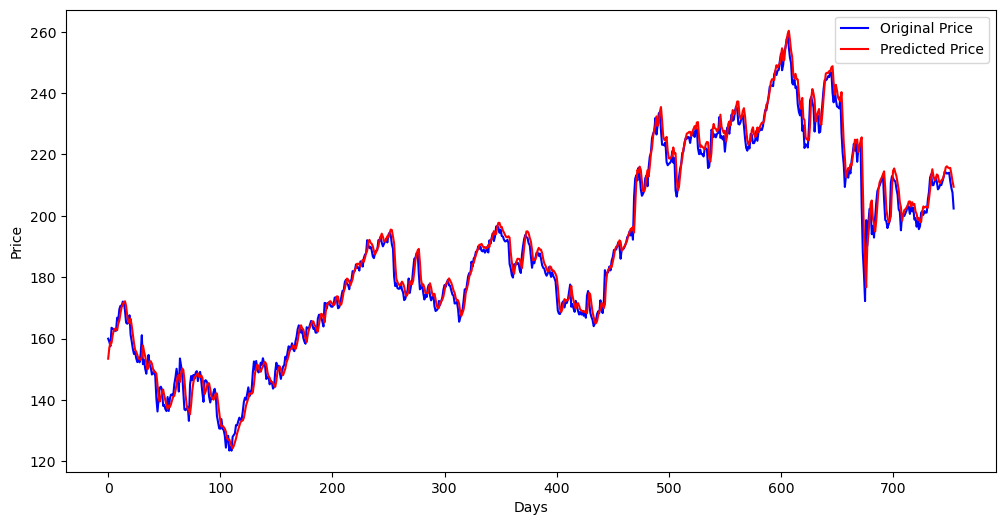

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

(160.0, 280.0)

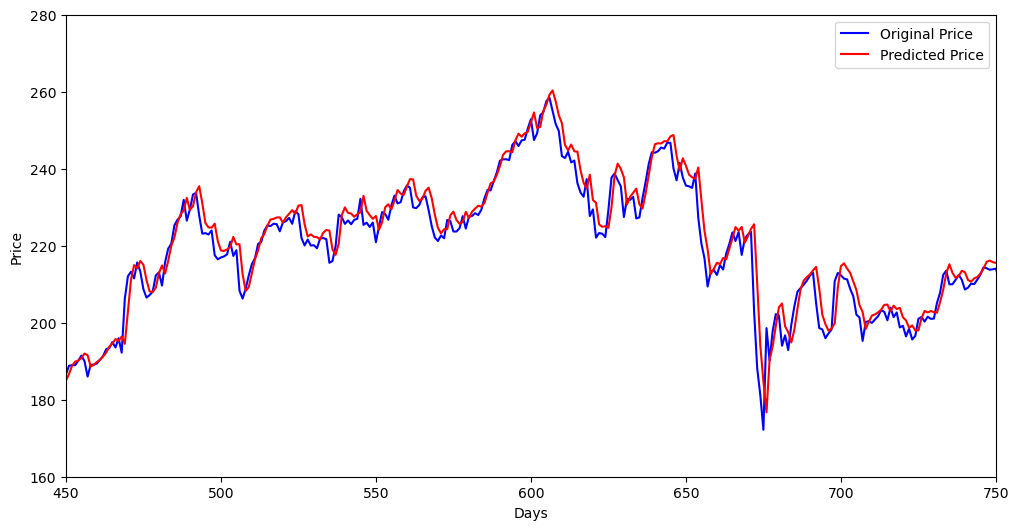

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(160, 280)

# 10. Model Evaluation

In [78]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 13.967225978256819


In [80]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 3.7372752077224414


In [81]:
# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.9855591021426879
